In [5]:
#mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#Data Collection
#mengimpor dataset dan menyimpan dalam dataframe
path = "..\Dataset\API_Kaggle\weather_classification_data.csv"
df = pd.read_csv(path)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [7]:
#Data Preprocessing
#mengubah nama kolom
new_names={'Precipitation (%)': 'Precipitation','Visibility (km)': 'Visibility'}
df.rename(columns=new_names, inplace=True)
#perintah inplace = True akan menyimpan perubahan yang dilakukan
#sehingga jika ditampilkan, dataframe tetap akan menyimpan perubahan tersebut
df

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [8]:
#mengecek apakah ada kolom yang bernilai NaN
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation           0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
Weather Type            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation         13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
#Data Transformation
#mengubah kolom dengan tipe data object
#menjadi data numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature = ['Cloud Cover', 'Season', 'Location' ]
df[feature] = df[feature].apply(le.fit_transform)
df

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,Rainy
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,Rainy
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,Snowy
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,Cloudy
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,Snowy


In [11]:
from sklearn.preprocessing import MinMaxScaler
#Memilih kolom fitur yang dinormalisasi
X = df.iloc[:, :10]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[0.29104478, 0.59550562, 0.19587629, ..., 1.        , 0.175     ,
        0.5       ],
       [0.47761194, 0.85393258, 0.17525773, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.41044776, 0.49438202, 0.1443299 , ..., 0.33333333, 0.275     ,
        1.        ],
       ...,
       [0.41044776, 0.64044944, 0.11340206, ..., 0.        , 0.45      ,
        0.        ],
       [0.20895522, 0.62921348, 0.20618557, ..., 1.        , 0.1       ,
        0.5       ],
       [0.14925373, 0.20224719, 0.        , ..., 0.        , 0.5       ,
        1.        ]])

In [12]:
#Memilih kolom target klasifikasi
y = df["Weather Type"]
y.head()

0     Rainy
1    Cloudy
2     Sunny
3     Sunny
4     Rainy
Name: Weather Type, dtype: object

In [13]:
#Membagi dataset menjadi data latih dan data uji
#dengan perbandingan 70% : 30%
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(df_scaled, y, test_size=0.3, random_state=3)

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset.shape)

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset.shape)

Ukuran X_trainset =  (9240, 10)
Ukuran y_trainset =  (9240,)
Ukuran X_testset =  (3960, 10)
Ukuran y_testset =  (3960,)


In [14]:
#Data Classification
#Membangun model klasifikasi dengan K-Nearest Neighbors
WeatherTree = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Melatih model dengan data latih
WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menampilkan Label uji yang seharusnya
#dan label hasil prediksi
result = pd. DataFrame({'True Label': y_testset, 'Predicted Label': y_predWeather})
result.head()

,True Label,Predicted Label
8063,Rainy,Snowy
2661,Sunny,Sunny
9386,Cloudy,Cloudy
3169,Rainy,Rainy
11018,Snowy,Snowy


In [15]:
#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("K-Nearest Neighbors's Accuracy: ", metrics.accuracy_score(y_testset, y_predWeather))

K-Nearest Neighbors's Accuracy:  0.8901515151515151


In [16]:
#Menghitung jumlah data uji yang sama
#dengan data prediksi
np.sum(y_predWeather == y_testset)

3525

In [17]:
#Data Classification
#Membangun model klasifikasi dengan K-Nearest Neighbors
WeatherTree = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto',
leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Melatih model dengan data Latih
WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menampilkan Label uji yang seharusnya
#dan label hasil prediksi
result = pd. DataFrame({'True Label': y_testset, 'Predicted Label': y_predWeather})
result.head()

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("K-Nearest Neighbors's Accuracy: ", metrics.accuracy_score(y_testset, y_predWeather))

K-Nearest Neighbors's Accuracy:  0.8893939393939394


In [18]:
#Membangun model klasifikasi dengan K-Nearest Neighbors
WeatherTree = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto',
leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menampilkan label uji yang seharusnya
#dan label hasil prediksi
result = pd. DataFrame({'True Label': y_testset, 'Predicted Label': y_predWeather})
result.head()

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("K-Nearest Neighbors's Accuracy: ", metrics.accuracy_score(y_testset, y_predWeather))

K-Nearest Neighbors's Accuracy:  0.8843434343434343


In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Membangun model klasifikasi dengan K-Nearest Neighbors
    WeatherTree = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto',
    leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    #Melatih model dengan data Latih
    WeatherTree.fit(X_trainset,y_trainset)
    #Memprediksi data uji dengan model
    y_predWeather = WeatherTree.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, y_predWeather)
    std_acc[n-1]=np.std(y_predWeather == y_testset)/np.sqrt(y_predWeather.shape[0])

mean_acc

array([0.88939394, 0.89217172, 0.88914141, 0.89368687, 0.89015152,
       0.89141414, 0.88712121, 0.88787879, 0.88535354])

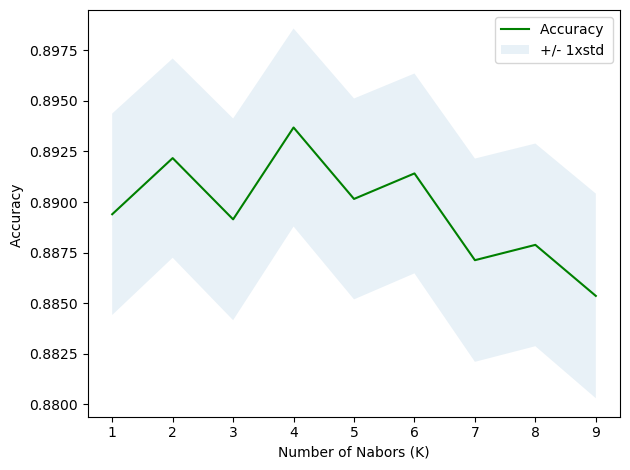

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [21]:
print("The Best Accuracy was with", mean_acc.max(), "with K=", mean_acc.argmax()+1)

The Best Accuracy was with 0.8936868686868686 with K= 4
